## Part I: Define an RL Environment

In [4]:
# imorting libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import gym
from gym import spaces


In [ ]:
# Defining RL Env (Theme: Escape Room Game)
class EscapeRoomGame(gym.Env):
    def __init__(self):
        super(EscapeRoomGame, self).__init__()

        # Defining grid size and state space
        self.grid_size = 5
        self.exit_state = (4, 4)
        self.steps_taken = 0  # Initializing step counter
        self.state_space = []
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.state_space.append((i, j))

        # Defining action space (0: Up, 1: Right, 2: Down, 3: Left)
        self.action_space = spaces.Discrete(4)

        # states and rewards
        self.observations = spaces.Discrete(len(self.state_space))
        self.rewards = {
            "key": 20,
            "door": 10,
            "step_cost": -5,
            "trap": -15,
            "exit": 50
        }

        # Defining keys, doors, traps, and exit locations of the grid
        self.keys = [(1, 1), (3, 3)]
        self.doors = [(2, 2), (4, 2)]
        self.traps = [(0, 4), (3, 1)]
        self.start_state = (0, 0)
        self.has_key = False  # it is to track if the agent has collected a key
        self.current_state = self.start_state

        # Loading images for each element (to make it interactive)
        self.agent_img = mpimg.imread('agent_idle.png')
        self.key_img = mpimg.imread('key.png')
        self.trap_img = mpimg.imread('trap.png')
        self.door_img = mpimg.imread('door.png')
        self.exit_img = mpimg.imread('exit.png')

    def step(self, action):
      self.steps_taken += 1

      # Current position
      x, y = self.current_state
      new_x, new_y = x, y

      # Checking if the action leads to a valid move within boundaries
      if action == 0 and x > 0:               # Up, only if not at top boundary
          new_x = x - 1
      elif action == 1 and y < self.grid_size - 1:  # Right, only if not at right boundary
          new_y = y + 1
      elif action == 2 and x < self.grid_size - 1:  # Down, only if not at bottom boundary
          new_x = x + 1
      elif action == 3 and y > 0:               # Left, only if not at left boundary
          new_y = y - 1

      # this keeps record whether the agent got thorugh exit or not
      goal_reached = False


      # Updating state and rewards

      # invalid moves (moves which are not allowed)

      if (new_x, new_y) == (x, y):  # If position has not changed, agent hit a boundary
          reward_points = 0  # No penalty or reward for invalid move
          status = "Boundary Hit"

      else:
          # Valid move
          self.current_state = (new_x, new_y)
          reward_points = self.rewards["step_cost"]
          status = "Moving"

          # Checking for rewards
          if self.current_state == self.exit_state:
              reward_points = self.rewards["exit"]
              status = "Reached Exit"
              goal_reached = True
          elif self.current_state in self.keys:
              reward_points = self.rewards["key"]
              self.has_key = True
              status = "Key Collected"
          elif self.current_state in self.traps:
              reward_points = self.rewards["trap"]
              status = "Hit Trap"
          elif self.current_state in self.doors and self.has_key:
              reward_points = self.rewards["door"]
              self.has_key = False
              status = "Unlocked Door"
          goal_reached = False

      # Returning state and rewards
      return self.current_state, reward_points, goal_reached, status, self.steps_taken


    def reset(self):
        self.current_state = self.start_state
        self.has_key = False
        return self.current_state

    def render(self, action=None, reward_points=None, status=""):
        # Creating the plot with extra space above the grid to print what's happening in the grid
        action_names = ["Up", "Right", "Down", "Left"]

        # formatting the text for better visualization
        bold_italic = "\033[1;3m"  # ANSCI escape codes for formatting the text
        txt_reset = "\033[0m"

        # Displaying the information above the grid which tell what action did the agent took and what happend
        print(f"📍{bold_italic} Current Agent Position:{txt_reset} {self.current_state}")

        if action is not None:
          print(f"➡️{bold_italic} Action Taken:{txt_reset} {action_names[action]}")

        if reward_points is not None:
          print(f"💰{bold_italic} Reward:{txt_reset} {reward_points}")

        print(f"📋{bold_italic} Status:{txt_reset} {status}")

        fig, axes = plt.subplots(figsize=(6, 6))

        # plot limits for the grid
        axes.set_xlim(0, self.grid_size)
        axes.set_ylim(0, self.grid_size)


        # Drawing each cell in the grid
        for x in range(self.grid_size):
            for y in range(self.grid_size):
                if (x, y) == self.current_state:
                    img = self.agent_img   # Agent
                elif (x, y) in self.keys:
                    img = self.key_img     # Key
                elif (x, y) in self.traps:
                    img = self.trap_img    # Trap
                elif (x, y) in self.doors:
                    img = self.door_img    # Door
                elif (x, y) == self.exit_state:
                    img = self.exit_img    # Exit
                else:
                    img = None

                if img is not None:
                    axes.imshow(img, extent=(y, y + 1, self.grid_size - x - 1, self.grid_size - x))
                else:
                    # Drawing an empty cell
                    axes.add_patch(patches.Rectangle((y, self.grid_size - x - 1), 1, 1, color="lightgrey"))

        # making grid border bold (using set_linewidth to increae thickness)
        for border in axes.spines.values():
          border.set_linewidth(1.5)
          border.set_edgecolor("black")

        # grid lines
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid()
        plt.show()

Starting Position: (0, 0)
Step: 1, Action: 1, New State: (0, 1), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 1)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


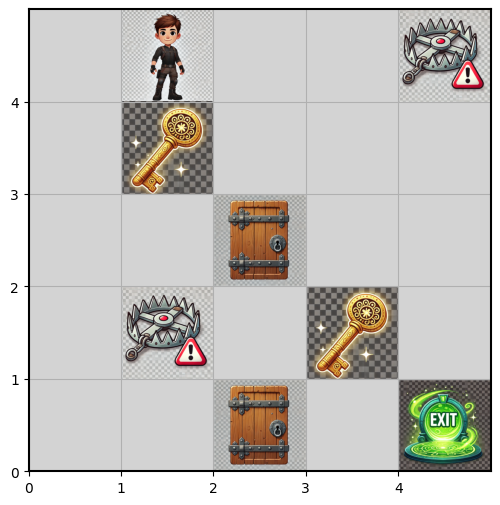

----------------------------------------------------------------------
Step: 2, Action: 2, New State: (1, 1), Reward: 20, Status: Key Collected

📍 Current Agent Position: (1, 1)
➡️ Action Taken: Down
💰 Reward: 20
📋 Status: Key Collected


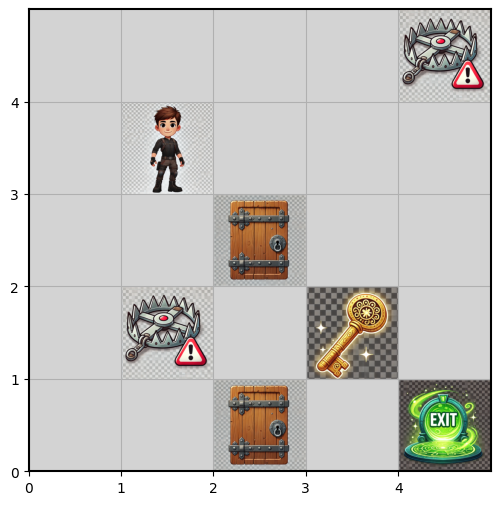

----------------------------------------------------------------------
Step: 3, Action: 1, New State: (1, 2), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 2)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


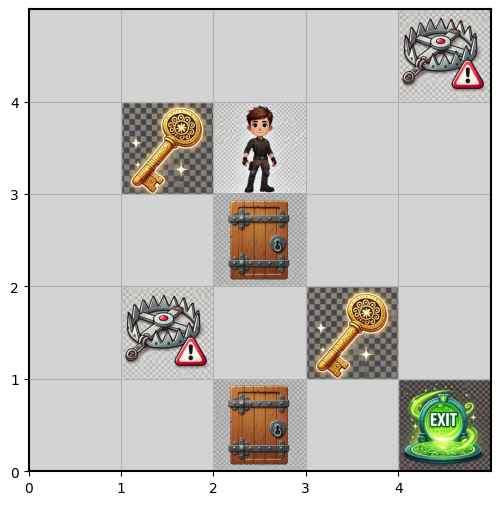

----------------------------------------------------------------------
Step: 4, Action: 2, New State: (2, 2), Reward: 10, Status: Unlocked Door

📍 Current Agent Position: (2, 2)
➡️ Action Taken: Down
💰 Reward: 10
📋 Status: Unlocked Door


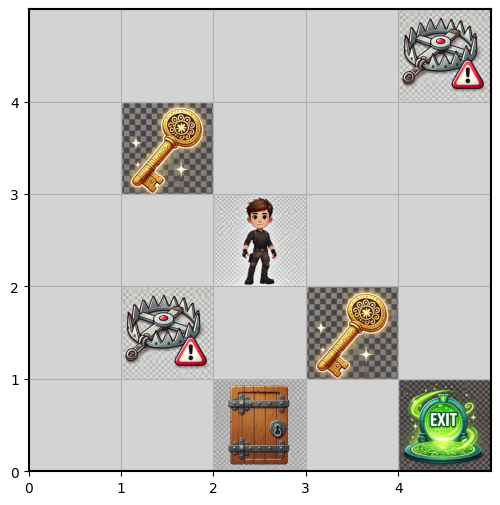

----------------------------------------------------------------------
Step: 5, Action: 1, New State: (2, 3), Reward: -5, Status: Moving

📍 Current Agent Position: (2, 3)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


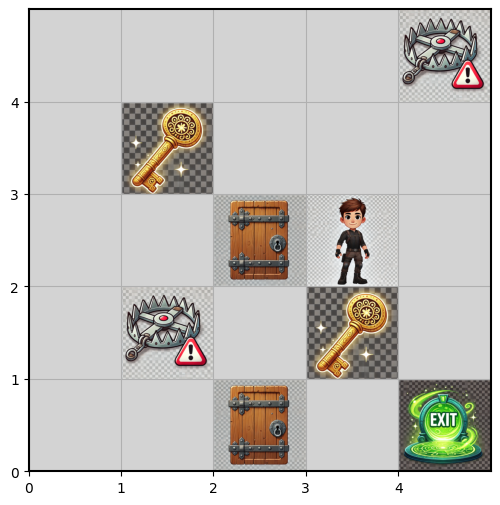

----------------------------------------------------------------------
Step: 6, Action: 2, New State: (3, 3), Reward: 20, Status: Key Collected

📍 Current Agent Position: (3, 3)
➡️ Action Taken: Down
💰 Reward: 20
📋 Status: Key Collected


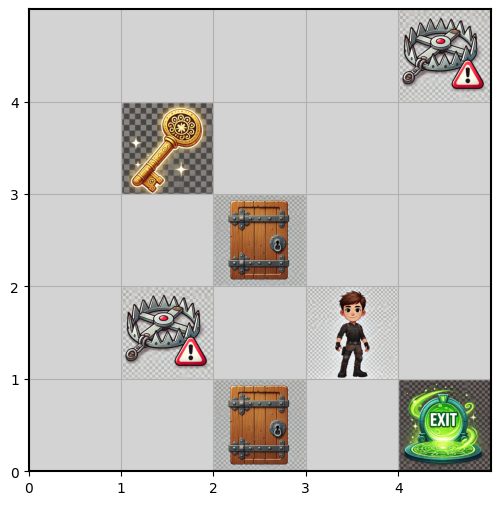

----------------------------------------------------------------------
Step: 7, Action: 1, New State: (3, 4), Reward: -5, Status: Moving

📍 Current Agent Position: (3, 4)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


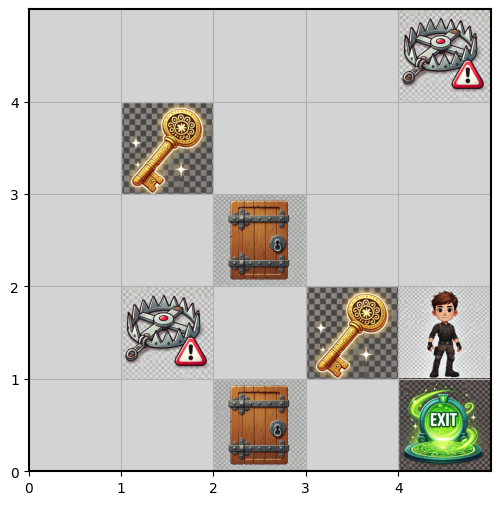

----------------------------------------------------------------------
Step: 8, Action: 1, New State: (3, 4), Reward: 0, Status: Boundary Hit

📍 Current Agent Position: (3, 4)
➡️ Action Taken: Right
💰 Reward: 0
📋 Status: Boundary Hit


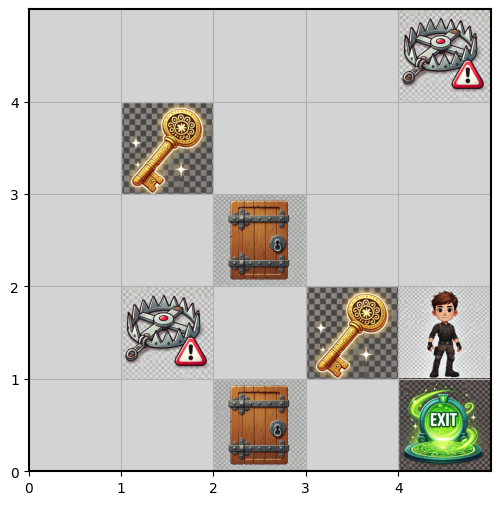

----------------------------------------------------------------------
Step: 9, Action: 1, New State: (3, 4), Reward: 0, Status: Boundary Hit

📍 Current Agent Position: (3, 4)
➡️ Action Taken: Right
💰 Reward: 0
📋 Status: Boundary Hit


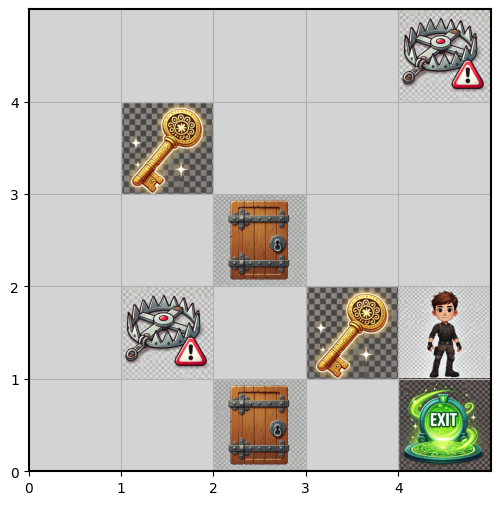

----------------------------------------------------------------------
Step: 10, Action: 2, New State: (4, 4), Reward: 50, Status: Reached Exit

📍 Current Agent Position: (4, 4)
➡️ Action Taken: Down
💰 Reward: 50
📋 Status: Reached Exit


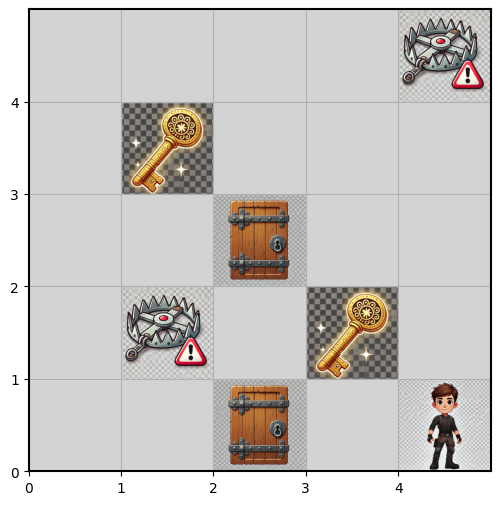

----------------------------------------------------------------------


In [62]:
# displaying the results for 10 random timesteps
my_env = EscapeRoomGame()
state = my_env.reset()
print("Starting Position:", my_env.current_state)

for i in range(10):
  action = my_env.action_space.sample()  # Random
  new_state, reward_points, goal_reached, status, steps_taken = my_env.step(action)

  #displaying the details
  print(f"Step: {steps_taken}, Action: {action}, New State: {new_state}, Reward: {reward_points}, Status: {status}\n")

  # rendering the current state
  my_env.render(action, reward_points , status)
  # using separator line to better clarify steps from one another
  print("-" * 70)

  # checking if game is over or not
  if goal_reached:
    print("Exit reached!")
    break


### References

1. [OpenAI Gym Documentation](https://www.gymlibrary.dev/)  
2. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
3. [Unicode Full Emoji List](https://unicode.org/emoji/charts/full-emoji-list.html)  
4. [ANSI Escape Codes](https://en.wikipedia.org/wiki/ANSI_escape_code)  
5. [Python Random Module Documentation](https://docs.python.org/3/library/random.html)  
6. [Reinforcement Learning Introduction](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)  
7. [Matplotlib: Working with Images](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)

8. [Images for Grid World visualization are generated using DALL-E tool]

